In [1]:
# 生成模型所需数据

import numpy as np
import pandas as pd


## 数据个数
n = 20
## 生成远离分离平面的数据
np.random.seed(2046)
X = np.r_[np.random.randn(n, 2) - [1, 1], np.random.randn(n, 2) + [3, 3]]
Y = [[0]] * n + [[1]] * n
data = np.concatenate((Y, X), axis=1)
data = pd.DataFrame(data, columns=["y", "x1", "x2"])
## 生成靠近分离平面的数据
hardMargin = [[0, 0, 2], [1, 1, -1]]
hardMargin = pd.DataFrame(hardMargin, columns=["y", "x1", "x2"])
data = data.append(hardMargin)

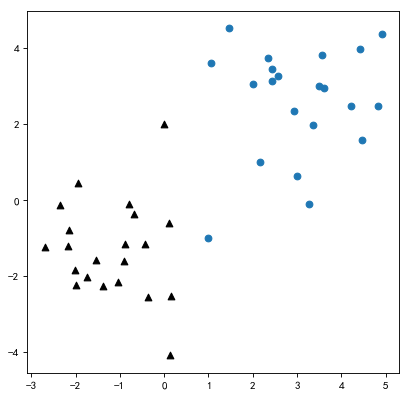

In [3]:
# 可视化数据
import matplotlib.pyplot as plt


## 创建一个图形框
fig = plt.figure(figsize=(6, 6), dpi=80)
## 确保图形中负号显示正确
plt.rcParams['axes.unicode_minus']=False
label1 = data[data["y"]>0]
plt.scatter(label1[["x1"]], label1[["x2"]], marker="o")
label0 = data[data["y"]==0]
plt.scatter(label0[["x1"]], label0[["x2"]], marker="^", color="k")

In [4]:
# 可视化模型结果

def visualize(data, res):
    """
    将模型结果可视化
    """
    # 创建一个图形框
    fig = plt.figure(figsize=(6, 6), dpi=80)
    # 在图形框里画一幅图
    ax = fig.add_subplot(1, 1, 1)
    label1 = data[data["y"]>0]
    ax.scatter(label1[["x1"]], label1[["x2"]], marker="o")
    label0 = data[data["y"]==0]
    ax.scatter(label0[["x1"]], label0[["x2"]], marker="^", color="k")
    # 画成模型的分离直线和分离边界
    ## 得到平面上所有点的组合
    x1 = np.linspace(-4, 6, 100)
    x2 = np.linspace(-8, 8, 100)
    X1, X2 = np.meshgrid(x1, x2)
    # 模型结果
    ## 计算平面上点的到分离直线的“距离”
    pred = res.decision_function(np.c_[X1.ravel(), X2.ravel()])
    pred = pred.reshape(X1.shape)
    ax.contour(X1, X2, pred, levels=[-1, 0, 1], colors=["r", "r", "r"],
        linestyles=["--", "-", "--"])
    plt.show()

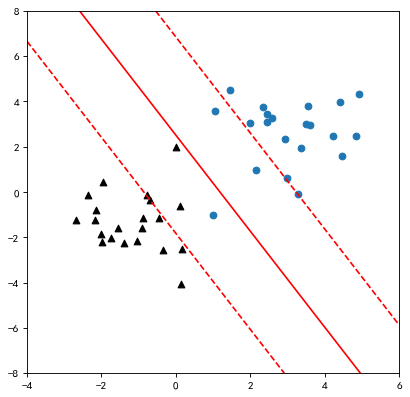

In [5]:
# Soft margin

from sklearn.svm import SVC


C_ = 0.1
model = SVC(C=C_, kernel="linear")
model.fit(data[["x1", "x2"]], data["y"])
visualize(data, model)

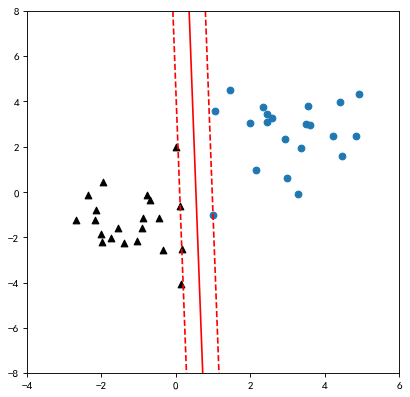

In [6]:
# Hard margin

C_ = 10.0
model = SVC(C=C_, kernel="linear")
model.fit(data[["x1", "x2"]], data["y"])
visualize(data, model)